In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import box, Polygon
import numpy as np

In [3]:
# https://opendata.riik.ee/et/dataset/avaliku-korra-vastased-ja-avalikus-kohas-toime-pandud-syyteod
# https://opendata.smit.ee/ppa/csv/avalik_3.csv

import urllib.request
local_file, headers = urllib.request.urlretrieve("https://opendata.smit.ee/ppa/csv/avalik_3.csv")

# read the CSV and strip whitespace
df = pd.read_table(local_file).apply(lambda col: col.str.strip())
df[df == ""] = np.nan

# convert the provided L-EST coordinate ranges to box-shaped Shapely polygons
lest_x = df.Lest_X.str.split('-', expand=True).apply(pd.to_numeric)
lest_y = df.Lest_Y.str.split('-', expand=True).apply(pd.to_numeric)

geoms = [box(*bounds) if np.isfinite(sum(bounds)) else Polygon() 
         for bounds in zip(lest_y[0], lest_x[0], lest_y[1] + 1, lest_x[1] + 1)]

# create a GeoDataFrame
gdf_3301_poly = gpd.GeoDataFrame(df.copy(), geometry=geoms, crs='epsg:3301')

# convert L-EST to WGS84 (lon-lat)
gdf_wgs84_poly = gdf_3301_poly.to_crs({'init': 'epsg:4326'})


In [4]:
gdf_3301_poly.sample(5)

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,SyndmusLiik,SyndmusTaiendavStatLiik,Seadus,Paragrahv,ParagrahvTais,Loige,Kahjusumma,KohtLiik,MaakondNimetus,ValdLinnNimetus,KohtNimetus,Lest_X,Lest_Y,SyyteoLiik,geometry
38682,ec2c8272-1635-18d5-8326-a9a756483dba,2012-02-22,13:45,Kolmapäev,PISIVARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinna linn,Lasnamäe linnaosa,6587000-6587499,545000-545499,VT,"POLYGON ((545500.000 6587000.000, 545500.000 6..."
7462,42966c36-1636-18d5-8326-a9a756483dba,2014-05-03,20:44,Laupäev,AVALIKU_KORRA_RIKKUMINE,NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,NaN,NaN,TREPIKODA_KORIDOR,Ida-Viru maakond,Narva linn,Narva linn,6589000-6589499,737000-737499,VT,"POLYGON ((737500.000 6589000.000, 737500.000 6..."
30507,ec30cd46-1635-18d5-8326-a9a756483dba,2012-08-31,00:30,Reede,VARGUS,"MOBIILTELEFONIVARGUS,MUU_VARGUS",Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,500-4999,"AVALIK_KOHT,OOKLUBI_DISKOTEEK",Harju maakond,Tallinna linn,Kesklinna linnaosa,6588500-6588999,542500-542999,KT,"POLYGON ((543000.000 6588500.000, 543000.000 6..."
14328,ec392cf2-1635-18d5-8326-a9a756483dba,2013-10-21,17:01,Esmaspäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinna linn,Nõmme linnaosa,6580000-6580499,535500-535999,KT,"POLYGON ((536000.000 6580000.000, 536000.000 6..."
3787,42968d06-1636-18d5-8326-a9a756483dba,2014-08-16,03:00,Laupäev,MUU,INIMESTE_SOLVAV_TULITAMINE,Karistusseadustik,§ 263.,§ 263. Avaliku korra raske rikkumine,NaN,0-499,SOOGIKOHT,Tartu maakond,Elva linn,Elva linn,6456000-6456499,641500-641999,KT,"POLYGON ((642000.000 6456000.000, 642000.000 6..."


In [5]:
gdf_3301_poly.describe()

AttributeError: 'GeometryArray' object has no attribute 'value_counts'

In [4]:
gdf_wgs84_poly.head()

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,SyndmusLiik,SyndmusTaiendavStatLiik,Seadus,Paragrahv,ParagrahvTais,Loige,Kahjusumma,KohtLiik,MaakondNimetus,ValdLinnNimetus,KohtNimetus,Lest_X,Lest_Y,SyyteoLiik,geometry
0,ec3331bc-1635-18d5-8326-a9a756483dba,2012-12-31,23:40,Esmaspäev,VARGUS,"MOBIILTELEFONIVARGUS,TASKUVARGUS",Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,500-4999,"AVALIK_KOHT,TANAV_VALJAK",Harju maakond,Tallinna linn,Kesklinna linnaosa,6588500-6588999,542000-542499,KT,"POLYGON ((24.74885364713002 59.43221303601485,..."
1,4295b43a-1636-18d5-8326-a9a756483dba,2012-12-31,23:30,Esmaspäev,"MUU,AVALIKU_KORRA_RIKKUMINE",NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,NaN,0-499,TREPIKODA_KORIDOR,Harju maakond,Harku vald,Tutermaa küla,6576000-6576999,526000-526999,VT,"POLYGON ((24.47419704613005 59.32128033236537,..."
2,4295b05c-1636-18d5-8326-a9a756483dba,2012-12-31,23:30,Esmaspäev,"AVALIKU_KORRA_RIKKUMINE,MUU",NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,NaN,NaN,TANAV_VALJAK,Ida-Viru maakond,Alajõe vald,Alajõe küla,6546000-6546999,696000-696999,VT,"POLYGON ((27.42998099344644 59.00759919671653,..."
3,ec333374-1635-18d5-8326-a9a756483dba,2012-12-31,23:00,Esmaspäev,VARGUS,MOBIILTELEFONIVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,0-499,"AVALIK_KOHT,OOKLUBI_DISKOTEEK",Harju maakond,Tallinna linn,Kesklinna linnaosa,6588500-6588999,542000-542499,KT,"POLYGON ((24.74885364713002 59.43221303601485,..."
4,ec333a2c-1635-18d5-8326-a9a756483dba,2012-12-31,22:00,Esmaspäev,VARGUS,MOBIILTELEFONIVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,0-499,"AVALIK_KOHT,OOKLUBI_DISKOTEEK",Harju maakond,Tallinna linn,Kesklinna linnaosa,6589000-6589499,543000-543499,KT,"POLYGON ((24.76657289526347 59.43659948004789,..."


In [5]:
coords_wgs84 = [(p.x, p.y) if not p.is_empty else (None, None) for p in gdf_wgs84_poly.centroid]

coords_wgs84[:10]

[(24.74449787937505, 59.434481914324905),
 (24.465476843546618, 59.325799868904205),
 (27.421734289226645, 59.012311141579275),
 (24.74449787937505, 59.434481914324905),
 (24.76221774514266, 59.43886894055929),
 (25.72581113926665, 59.58465107252588),
 (24.876873690728573, 59.442643877238474),
 (26.360123590039418, 59.34806096680441),
 (24.744693502926626, 59.443457595363995),
 (27.19318216091814, 57.858623235881936)]

In [6]:
latlon_df = pd.concat([
    df.drop(['Lest_X', 'Lest_Y'], axis=1), 
    pd.DataFrame(coords_wgs84, columns=['lon', 'lat']),
    pd.Series(np.sqrt(gdf_3301_poly.area), name='KoordTapsus').astype(int)
], axis=1)

latlon_df.head()

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,SyndmusLiik,SyndmusTaiendavStatLiik,Seadus,Paragrahv,ParagrahvTais,Loige,Kahjusumma,KohtLiik,MaakondNimetus,ValdLinnNimetus,KohtNimetus,SyyteoLiik,lon,lat,KoordTapsus
0,ec3331bc-1635-18d5-8326-a9a756483dba,2012-12-31,23:40,Esmaspäev,VARGUS,"MOBIILTELEFONIVARGUS,TASKUVARGUS",Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,500-4999,"AVALIK_KOHT,TANAV_VALJAK",Harju maakond,Tallinna linn,Kesklinna linnaosa,KT,24.744498,59.434482,500
1,4295b43a-1636-18d5-8326-a9a756483dba,2012-12-31,23:30,Esmaspäev,"MUU,AVALIKU_KORRA_RIKKUMINE",NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,NaN,0-499,TREPIKODA_KORIDOR,Harju maakond,Harku vald,Tutermaa küla,VT,24.465477,59.325800,1000
2,4295b05c-1636-18d5-8326-a9a756483dba,2012-12-31,23:30,Esmaspäev,"AVALIKU_KORRA_RIKKUMINE,MUU",NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,NaN,NaN,TANAV_VALJAK,Ida-Viru maakond,Alajõe vald,Alajõe küla,VT,27.421734,59.012311,1000
3,ec333374-1635-18d5-8326-a9a756483dba,2012-12-31,23:00,Esmaspäev,VARGUS,MOBIILTELEFONIVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,0-499,"AVALIK_KOHT,OOKLUBI_DISKOTEEK",Harju maakond,Tallinna linn,Kesklinna linnaosa,KT,24.744498,59.434482,500
4,ec333a2c-1635-18d5-8326-a9a756483dba,2012-12-31,22:00,Esmaspäev,VARGUS,MOBIILTELEFONIVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,0-499,"AVALIK_KOHT,OOKLUBI_DISKOTEEK",Harju maakond,Tallinna linn,Kesklinna linnaosa,KT,24.762218,59.438869,500


In [7]:
latlon_df.to_csv('avalik_3_lonlat.tsv', index=False, sep='\t', float_format='%.5f')
latlon_df.to_csv('avalik_3_lonlat.csv', index=False, sep=',', float_format='%.5f')

In [8]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.family'] = 'sans-serif'

%matplotlib inline

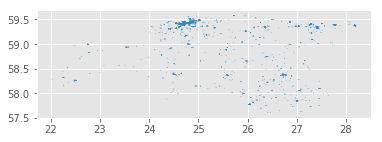

In [9]:
gdf_wgs84_poly.plot()

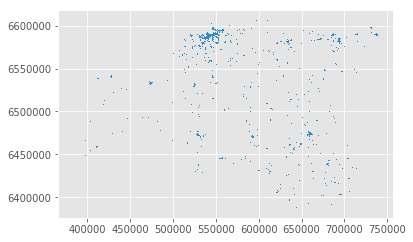

In [10]:
gdf_3301_poly.plot()

In [11]:
from shapely.geometry import Point

def make_point(row):
    return Point(row['lon'], row['lat'])

# Go through every row, and make a point out of its lat and lon
points_wgs84 = latlon_df.apply(make_point, axis=1)

# Make a new GeoDataFrame
# using the data from our old df
# but also adding in the geometry we just made
gdf_wgs84_points = gpd.GeoDataFrame(latlon_df, geometry=points_wgs84)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
gdf_wgs84_points.crs = {'init': 'epsg:4326'}

gdf_wgs84_points.head()

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,SyndmusLiik,SyndmusTaiendavStatLiik,Seadus,Paragrahv,ParagrahvTais,Loige,Kahjusumma,KohtLiik,MaakondNimetus,ValdLinnNimetus,KohtNimetus,SyyteoLiik,lon,lat,KoordTapsus,geometry
0,ec3331bc-1635-18d5-8326-a9a756483dba,2012-12-31,23:40,Esmaspäev,VARGUS,"MOBIILTELEFONIVARGUS,TASKUVARGUS",Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,500-4999,"AVALIK_KOHT,TANAV_VALJAK",Harju maakond,Tallinna linn,Kesklinna linnaosa,KT,24.744498,59.434482,500,POINT (24.74449787937505 59.43448191432491)
1,4295b43a-1636-18d5-8326-a9a756483dba,2012-12-31,23:30,Esmaspäev,"MUU,AVALIKU_KORRA_RIKKUMINE",NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,NaN,0-499,TREPIKODA_KORIDOR,Harju maakond,Harku vald,Tutermaa küla,VT,24.465477,59.325800,1000,POINT (24.46547684354662 59.32579986890421)
2,4295b05c-1636-18d5-8326-a9a756483dba,2012-12-31,23:30,Esmaspäev,"AVALIKU_KORRA_RIKKUMINE,MUU",NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,NaN,NaN,TANAV_VALJAK,Ida-Viru maakond,Alajõe vald,Alajõe küla,VT,27.421734,59.012311,1000,POINT (27.42173428922665 59.01231114157927)
3,ec333374-1635-18d5-8326-a9a756483dba,2012-12-31,23:00,Esmaspäev,VARGUS,MOBIILTELEFONIVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,0-499,"AVALIK_KOHT,OOKLUBI_DISKOTEEK",Harju maakond,Tallinna linn,Kesklinna linnaosa,KT,24.744498,59.434482,500,POINT (24.74449787937505 59.43448191432491)
4,ec333a2c-1635-18d5-8326-a9a756483dba,2012-12-31,22:00,Esmaspäev,VARGUS,MOBIILTELEFONIVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,0-499,"AVALIK_KOHT,OOKLUBI_DISKOTEEK",Harju maakond,Tallinna linn,Kesklinna linnaosa,KT,24.762218,59.438869,500,POINT (24.76221774514266 59.43886894055929)


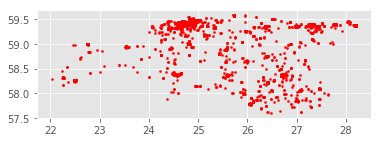

In [12]:
gdf_wgs84_points.plot(marker='o', color='red', markersize=4)

# ax=base, marker='o', column='RANGE', cmap='OrRd', scheme="quantiles", markersize=4

In [13]:
eesti = pts = gpd.GeoDataFrame.from_file("./estonia/admin_level_6.geojson")

In [14]:
eesti.head()

,name,name:be,name:et,name:lt,name:ru,name:uk,alt_name,boundary,EHAK:code,wikipedia,admin_level,name:be-tarask,name:de,name:pl,is_in:country_code,geometry
0,Saare maakond,Павет Саарэ,Saare maakond,Sarės apskritis,Уезд Сааремаа,повіт Сааремаа,Saaremaa,administrative,74,et:Saare maakond,6,Павет Саарэ,None,None,None,"(POLYGON ((23.6485 57.78290000000001, 23.61359..."
1,Pärnu maakond,Павет Пярну,Pärnu maakond,None,Уезд Пярнумаа,повіт Пярнумаа,Pärnumaa,administrative,67,et:Pärnu maakond,6,Павет Пярну,None,None,None,"(POLYGON ((25.30718 58.7061515, 25.3068206 58...."
2,Hiiu maakond,Павет Хійу,None,None,Уезд Хийумаа,повіт Хіюмаа,Hiiumaa,administrative,39,et:Hiiu maakond,6,Павет Хію,None,None,None,"(POLYGON ((23.2630062 58.73046230000001, 23.04..."
3,Lääne maakond,Павет Ляэнэ,None,None,Уезд Ляэнемаа,повіт Ляянемаа,Läänemaa,administrative,57,et:Lääne maakond,6,Павет Ляэнэ,None,None,None,"(POLYGON ((24.1925964 58.8428427, 24.1915243 5..."
4,Ida-Viru maakond,Павет Іда-Віру,Ida-Viru maakond,Rytų Viru apskritis,Уезд Ида-Вирумаа,повіт Іда-Вірумаа,Ida-Virumaa,administrative,44,et:Ida-Viru maakond,6,Павет Іда-Віру,Kreis Ost-Wierland,None,EE,"(POLYGON ((28.2100175 59.3703677, 28.2090157 5..."


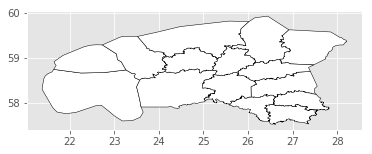

In [15]:
eesti.plot(color='white', edgecolor='black')

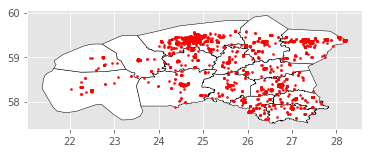

In [16]:
base = eesti.plot(color='white', edgecolor='black')
gdf_wgs84_points.plot(ax=base, marker='o', color='red', markersize=4)
